# Mini-Project: A Simple Search Engine from Scratch
In this mini-project you will study the fundaments of IR.

The mini-project is divided as follow:

- **Week 1**: Study the provided notebook. Using the VSM retrieval model, run experiments *(section 4)* with the provided collection. Compute the metrics MAP, P10 and precision-recall curves.

- **Week 2**: Implement the LMD and LMJM retrieval models and repeat the experiments with the new models. Compare it to the previous retrieval models.

- **Week 3**: Implement the RM3 retrieval model and repeat the experiments with the new models. Compare it to the previous retrieval models.

- **Week 4**: Implement the BM25 retrieval model and repeat the experiments with the new models. Compare it to the previous retrieval models.

**Submission date: 15 October**

## 1. Vector Space Model

In the vector space model, documents are represented as a vector $d_j=(w_{d_j,1},w_{d_j,2}, ..., w_{d_j,n})$ of $n$ word frequencies -- most of the words are equal to 0. Queries are also represented as a vector of words $q_j=(w_{q_j,1},w_{q_j,2}, ..., w_{q_j,n})$. In the vector space model, each document word is weighted by their *tf-idf*

$${tf-idf} = tf*\frac{|D|}{log (df(w_a))}$$

The vector space model is based on the cosine similarity, which measures the angle between the two vectors in the 1-unit sphere:

$$cos(q,d) = \frac{\sum_t q_t\cdot d_t}{\sqrt{\sum_t q^2_t}\cdot \sqrt{\sum_t d^2_t }}$$


Below you can read the corresponding matricial implementation for multiple documents.

### Parser
Using the CountVectorizer class of Scikit-Learn, try the different parser options by generating unigrams and bigrams with different stop words.


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer #faz a separação de um texto em palavras

vectorizer = CountVectorizer()
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), #max number of words a vector entry can have
                                    token_pattern=r'\b\w+\b', #regExp that select one word or infinite words (w+)
                                    min_df=1, #min frequency, if it is int only if the word appears int times it will be stored
                                    stop_words = {'the', 'is'} #words that are irrelevant to the search
                                   )

corpus = ['This is the first document.',
'This is the second second document.',
'And the third one.',
'Is this the first document?', ]

In [2]:
uni_analyze = vectorizer.build_analyzer()
uni_analyze("This is a text document to analyze.")

['this', 'is', 'text', 'document', 'to', 'analyze']

In [3]:
tf_uni = vectorizer.fit_transform(corpus).toarray()
print(vectorizer.get_feature_names())
print()
print(tf_uni)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [4]:
bi_analyze = bigram_vectorizer.build_analyzer()
bi_analyze("This is a text document to analyze.") 

['this',
 'a',
 'text',
 'document',
 'to',
 'analyze',
 'this a',
 'a text',
 'text document',
 'document to',
 'to analyze']

In [5]:
tf_bi = bigram_vectorizer.fit_transform(corpus).toarray()
print(bigram_vectorizer.get_feature_names())
print()
print(tf_bi)

['and', 'and third', 'document', 'first', 'first document', 'one', 'second', 'second document', 'second second', 'third', 'third one', 'this', 'this first', 'this second']

[[0 0 1 1 1 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 2 1 1 0 0 1 0 1]
 [1 1 0 0 0 1 0 0 0 1 1 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 1 1 0]]


In [6]:
print(bigram_vectorizer.vocabulary_.get('document')) # returns the index of the word in the array

2


### TF IDF and the cosine similarity

In [8]:
termCollFreq = np.sum(tf_uni != 0, axis = 0) #axis = 0 -> eixo dos x
docLen = np.sum(tf_uni, axis = 1) #axis = 1 -> eixo dos y

idf = np.log(np.size(corpus)/termCollFreq)
idf_rows = np.dot(np.ones((np.size(corpus),1)), #creates an identity matrix given the shape and type
                  idf.reshape(1,np.size(idf)) #normalize the array
                 )
tfidf = tf_uni*idf_rows

docNorms = np.sqrt(np.sum(np.power(tfidf,2), axis = 1)) #primeiro sqrt
        
print("\ntf:\n", tf_uni)
print("\nidf:\n", idf)
print("\ntfidf:\n", tfidf)
print("\ndocnorms:\n", docNorms)

print("\nmin idf:\n", min(docNorms))


tf:
 [[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]

idf:
 [1.38629436 0.28768207 0.69314718 0.28768207 1.38629436 1.38629436
 0.         1.38629436 0.28768207]

tfidf:
 [[0.         0.28768207 0.69314718 0.28768207 0.         0.
  0.         0.         0.28768207]
 [0.         0.28768207 0.         0.28768207 0.         2.77258872
  0.         0.         0.28768207]
 [1.38629436 0.         0.         0.         1.38629436 0.
  0.         1.38629436 0.        ]
 [0.         0.28768207 0.69314718 0.28768207 0.         0.
  0.         0.         0.28768207]]

docnorms:
 [0.85366032 2.81700748 2.40113227 0.85366032]

min idf:
 0.8536603178950374


In [12]:
query = 'document'
query_vector = vectorizer.transform([query]).toarray()
queryNorm = np.sqrt(np.sum(np.power(query_vector, 2), axis = 1)) #segundo sqrt

doc_scores = np.dot(query_vector, tfidf.T)/(docNorms*queryNorm) #formula acima

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Inverted Index
The matricial implementation is not scalable because it computes the similarity for all documents in the collection. However, one should only compute the similarity for the documents containing the query words. This is where the inverted index comes to our rescue.

Read the inverted index implementation presented next. Describe in your own words how the cosine similarity should be implemented with the inverted index:


In [13]:
features = vectorizer.get_feature_names()

i = 0
inverted_index = dict()
for token in features:
    print("==== Creating the posting list for token \"", token, "\"")
    #tf_uni[:,i] -> access column i 
    
    docs_with_token = np.where(tf_uni[:,i] != 0) #retrieves array with index where value is 'true'
    len = np.size(docs_with_token,1)
    
    #creates an array with an pair (value of position (docs_with_token, i), docs_with_token)
    postings_matrix = np.concatenate([tf_uni[docs_with_token,i], docs_with_token])
    
    #postings_matrix.T -> transpose the matrix
    #creates a list of tuples with the elements of the transposed matrix 'postings_matrix'
    postings_list = list(map(tuple, postings_matrix.T))
    inverted_index[token] = postings_list

    print(postings_list)
    i = i + 1

==== Creating the posting list for token " and "
[(1, 2)]
==== Creating the posting list for token " document "
[(1, 0), (1, 1), (1, 3)]
==== Creating the posting list for token " first "
[(1, 0), (1, 3)]
==== Creating the posting list for token " is "
[(1, 0), (1, 1), (1, 3)]
==== Creating the posting list for token " one "
[(1, 2)]
==== Creating the posting list for token " second "
[(2, 1)]
==== Creating the posting list for token " the "
[(1, 0), (1, 1), (1, 2), (1, 3)]
==== Creating the posting list for token " third "
[(1, 2)]
==== Creating the posting list for token " this "
[(1, 0), (1, 1), (1, 3)]


### Evaluation
Using the Vector Space Model, run the experiments of section 4.

We advice you to use an external Python IDE for editing more complex implementations. **The Notebook should be used as a notebook, not as an IDE**. Your implementations should be organized on external classes as below:

In [14]:
import RetrievalModelsMatrix as b

aa = b.RetrievalModelsMatrix(tf_uni, vectorizer)

aa.score_vsm('document')

array([[0.33695882, 0.10211967, 0.        , 0.33695882]])

## 2. Retrieval Models

In this section you will implement three of the most popular retrieval model. After finishing each retrieval model implementation, run the experiments of section 4 with the new model.

### Language Model with Jelineck-Mercer Smoothing (20%)
The family of Language Models for retrieval build on the density distribution of the terms over each document and the density distribution of terms over the collection of documents.

There several ways of avoiding the zero probabilities problem with term smoothing.  The Jelineck-Mercer smoothing model uses a mixture of probabilities between the document model $M_d$ and the corpus model $M_c$:

$$p(q|d,C)= \lambda \cdot p(q|M_d) + (1-\lambda)\cdot p(q|M_c)$$

Implement the LMJM retrieval model using the matricial definitions:

In [5]:
query = "document"
lamb = 0.5

termCollFreq = np.sum(tf_uni != 0, axis = 0) #axis = 0 -> eixo dos x
docLen = np.sum(tf_uni, axis = 1) #axis = 1 -> eixo dos y

ptmd = np.dot(np.ones((np.size(termCollFreq),1)), [docLen])


ptmd = tf_uni * (1/ptmd.T) #P(t|Md)

print('ptmd\n', ptmd)

ptmc = termCollFreq / sum(termCollFreq) #P(t|Mc)

print('ptmc\n', ptmc)

lmjm = lamb * ptmd + (1 - lamb) * ptmc

query_vec = vectorizer.transform([query]).toarray()

doc_score = np.prod(lmjm ** query_vec, axis = 1)


print(doc_score)


ptmd
 [[0.         0.2        0.2        0.2        0.         0.
  0.2        0.         0.2       ]
 [0.         0.16666667 0.         0.16666667 0.         0.33333333
  0.16666667 0.         0.16666667]
 [0.25       0.         0.         0.         0.25       0.
  0.25       0.25       0.        ]
 [0.         0.2        0.2        0.2        0.         0.
  0.2        0.         0.2       ]]
ptmc
 [0.05263158 0.15789474 0.10526316 0.15789474 0.05263158 0.05263158
 0.21052632 0.05263158 0.15789474]
[0.17894737 0.1622807  0.07894737 0.17894737]


Implement the LMJM retrieval model using the inverted-index data structures:

In [12]:
query = "document"

# TO DO: LMJM model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Language Model with Dirichlet Smoothing (20%)
Another way of avoiding the zero probabilities problem is with the Dirichlet smoothing model that uses a mixture of frequencies between the term document frequencies $f_{t,c}$ and the term corpus frequency $\mu \cdot M_c(t)$:

$$p(t|M_d, M_c)= \frac{f_{t,d}+\mu \cdot M_c(t)}{|d| + \mu}$$

Implement the LMD retrieval model using the matricial definitions:


In [8]:
corpus = [
    'Jackson was one of the most talented entertainers of all time',
    'Michael Jackson anointed himself King of Pop'
]

query = "Michael Jackson"

new = 100

vectorizer = CountVectorizer(stop_words = {'the', 'was', 'of'})

tf_uni = vectorizer.fit_transform(corpus).toarray()
termCollFreq = np.sum(tf_uni != 0, axis = 0) #axis = 0 -> eixo dos x
docLen = np.sum(tf_uni, axis = 1) #axis = 1 -> eixo dos y

ptmc = termCollFreq / sum(termCollFreq) #P(t|Mc)

query_vec = vectorizer.transform([query]).toarray()

arr = np.dot(np.ones((np.size(termCollFreq),1)), [docLen])

lmd = (tf_uni + new * ptmc) / (arr + new).T

doc_scores = np.prod(lmd ** query_vec, axis = 1)

print(doc_scores)


import RetrievalModelsMatrix as b

aa = b.RetrievalModelsMatrix(tf_uni, vectorizer)

result = aa.score_lmd(query)

print(result)

[0.01100843 0.01267534]
ptmc
 [0.07692308 0.07692308 0.07692308 0.07692308 0.15384615 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308]
[0.01100843 0.01267534]


Implement the LMD retrieval model using the inverted-index data structures:

In [14]:
query = "document"

# TO DO: LMD model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### BM 25 (20%)

The BM25 is model is an evolution of the tf-idf weighting based on a two Poisson distribution per term. It is obviously impossible to estimate each term distribution -- the approximation to the two Poisson distribution is given by the expression:

$$RSV = \sum q_t \cdot \frac{f_{t,d}(k_1 + 1)}{k_1 ((1-b) + b(\frac{l_d}{l_avg})) + f_{t,d} }\cdot IDF_t$$

Implement the BM5 retrieval model using the matricial definitions:

In [15]:
query = "document"

# TO DO: BM25 model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


Implement the BM25 retrieval model using the inverted-index data structures:

In [16]:
query = "document"

# TO DO: BM25 model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Evaluation
Using the implemented Retrieval Models, run the experiments of section 4.


## 3. Pseudo-Relevance Feedback (RM3) (20%)

Using the RM3 Model, run the experiments of section 4.

Implement the RM3 retrieval model using the matricial definitions:

In [17]:
query = "document"

# TO DO: RM3 model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


Implement the RM3 retrieval model using the inverted-index data structures:

In [18]:
query = "document"

# TO DO: RM3 model

print(doc_scores)

[[0.3369983  0.10212329 0.         0.3369983 ]]


### Evaluation
Using the implemented RM3 model, run the experiments of section 4.


## 4. Experiments and Results (20%)
The goal of this section is to compare experimentally the different retrieval models. In this section you must:
- Load the Cranfield documents.
- Run the implemented retrieval models
- Plot the precision-recall curves.
- Compute MAP.

Number of documents:  1400
Number of queries:  225
qid = 13 VSM     AP= 0.002857142857142857
query: 
 what is the basic mechanism of the transonic aileron buzz . 
qid = 19 VSM     AP= 0.04254775436659339
query: 
 does there exist a good basic treatment of the dynamics of re-entry combining consideration of realistic effects with relative simplicity of results . 
qid = 22 VSM     AP= 0.0007142857142857143
query: 
 did anyone else discover that the turbulent skin friction is not over sensitive to the nature of the variation of the viscosity with temperature . 
qid = 28 VSM     AP= 0.006408703726131363
query: 
 what application has the linear theory design of curved wings . 
qid = 31 VSM     AP= 0.0009242144177449168
query: 
 what size of end plate can be safely used to simulate two-dimensional flow conditions over a bluff cylindrical body of finite aspect ratio . 
qid = 35 VSM     AP= 0.03115147442485572
query: 
 are there any papers dealing with acoustic wave propagation in reacting gas

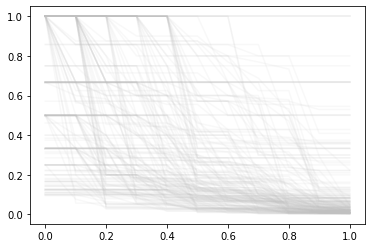

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import simpleparser as parser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import collectionloaders
import RetrievalModelsMatrix as models

verbose = True
bigrams = True
is_sw = 0.05

### 1. Load the corpus
cranfield = collectionloaders.CranfieldTestBed()

### 2. Parse the corpus
# Tokenize, stem and remove stop words
if not bigrams:
    vectorizer = CountVectorizer()
else:
    vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', 
                                    min_df=1)

corpus = parser.stemCorpus(cranfield.corpus_cranfield['abstract'])

### 3. Create the model
# Compute the term frequencies matrix and the model statistics
tf_cranfield = vectorizer.fit_transform(corpus).toarray()
models = models.RetrievalModelsMatrix(tf_cranfield, vectorizer)

### 4. Run the queries over the corpus
i = 1
map_vsm = 0
precision_vsm = []

for query in cranfield.queries:
    # Parse the query and compute the document scores
    scores = models.score_vsm(parser.stemSentence(query))

    # Do the evaluation
    [average_precision, precision, recall, thresholds] = cranfield.eval(scores, i)
    
    
    # Some messages...
    if is_sw > average_precision:
        print('qid =',i, 'VSM     AP=',average_precision)
        print('query: \n', query)
    else:
        map_vsm = map_vsm + average_precision
        precision_vsm.append(precision)
        plt.plot(recall, precision, color='silver', alpha=0.1)
    
    i = i + 1

map_vsm = map_vsm/cranfield.num_queries



In [1]:
import computation as c
import MAP_lambCalc as m

#aa = c.computation(False)

#aa.prec_rec_plot()

m.MAP_lambCalc(False)




[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


<Figure size 640x480 with 1 Axes>

Number of documents:  1400
Number of queries:  225

MAP =  0.005117460317460318

lamb =  0.0

MAP =  0.3018411675020372

lamb =  0.1

MAP =  0.30691314244477985

lamb =  0.2

MAP =  0.30597482972209483

lamb =  0.30000000000000004

MAP =  0.3027520740129853

lamb =  0.4

MAP =  0.30070385933979754

lamb =  0.5

MAP =  0.2984152826208429

lamb =  0.6000000000000001

MAP =  0.2972578014519433

lamb =  0.7000000000000001

MAP =  0.29096347972841846

lamb =  0.8

MAP =  0.28505108781599287

lamb =  0.9


In [9]:
#cranfield.queries

In [3]:
### Show results
print('MAP =',map_vsm)

mean_precision = np.mean(precision_vsm,axis=0)
std_precision = np.std(precision_vsm,axis=0)

plt.plot(recall, mean_precision, color='b', alpha=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.fill_between(recall, 
                 mean_precision - std_precision, 
                 mean_precision + std_precision, facecolor='b', alpha=0.1)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall (MAP={0:0.2f})'.format(map_vsm))
plt.savefig('results/prec-recall.png', dpi=100)


NameError: name 'map_vsm' is not defined

### Results and discussion


The following table summarizes the MAP and P10 results:

| Retrieval Model | P10 | MAP   |
|-----------------|-----|-------|
| VSM             | ?   | {{map_vsm}} |
| LMD             | ?   | ? |
| LMJM             | ?   | ? |
| BM25             | ?   | ? |

![](results/prec-recall.png)